[0 2 5 3 1 3 5 2 2 2 0 2 3 4 3 3 0 0 2 1 2 5 1 3 2 0 1 5 3 3 5 1 5 4 4 1 5
 2 2 3 1 2 2 0 4 1 4 5 1 0 3 0 1 0 1 5 5 1 0 1 0 1 0 3 2 2 2 2 2 1 3 0 3 3
 1 3 2 2 0 2 3 4 5 1 4 3 5 1 0 0 2 5 3 2 2 1 2 3 0 4 4 3 0 1 0 1 4 0 0 3 0
 4 2 1 1 3 4 0 2 1 0 2 5 3 5 3 4 5 3 3 4 1 2 4 4 2 5 3 3 4 0 0 2 3 2 4 0 5
 4 3 1 5 5 4 3 1 2 5 0 3 0 4 0 5 4 0 3 1 2 5 1 5 2 3 4 4 3 5 5 5 3 1 0 0 3
 5 2 0 3 3 2 1 4 2 0 0 2 5 5 3 2 0 1 0 5 1 5 3 1 1 2 1 4 0 1 3 5 1 0 5 4 4
 2 2 3 0 0 1 4 5 4 1 4 3 3 1 1 4 3 1 1 4 1 1 5 1 2 4 5 3 0 0 1 2 4 2 0 3 5
 1 1 3 0 0 2 4 1 2 4 0 1 4 5 3 2 4 0 5 5 2 2 0 5 5 4 4 3 1 5 1 5 4 0 3 1 2
 3 3 3 5 4 2 4 3 1 4 1 5 1 5 5 0 4 5 1 4 0 5 4 4 5 1 3 2 3 5 3 3 1 4 1 2 2
 3 1 5 3 0 5 5 1 4 1 4 5 2 2 3 1 5 5 1 3 2 1 1 1 2 5 1 2 1 1 3 3 0 2 5 2 1
 3 3 3 3 0 1 3 4 3 4 4 5 1 0 5 1 1 0 5 0 1 3 5 5 1 0 2 0 0 2 4 2 5 4 3 4 0
 2 1 1 2 4 0 0 2 2 2 5 5 4 1 2 5 2 1 4 4 1 3 0 1 2 1 5 4 4 0 0 2 0 2 1 4 5
 1 5 4 0 2 3 0 3 3 3 4 4 0 5 1 4 0 5 2 3 4 0 2 3 3 2 1 2 5 0 3 0 3 3 3 2 3
 4 0 1 3 3 3 0 3 2 4 3 3 

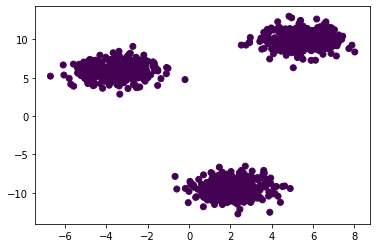

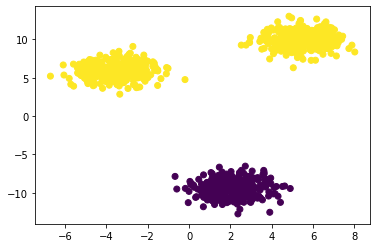

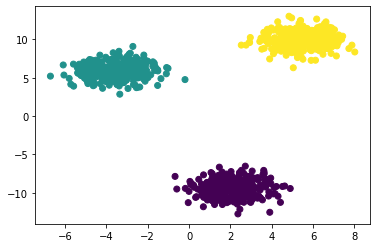

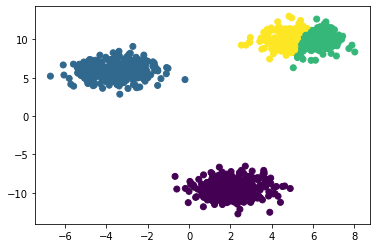

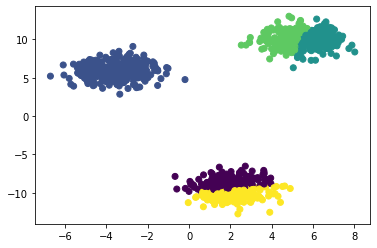

In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

def bkmeans(X, k, iter):
  currentCircles = np.zeros([len(X[:,0])], dtype="int64")
  count = 1
  
  for _ in range(k):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=currentCircles)
    
    arrayIndices = np.flatnonzero(currentCircles == np.bincount(currentCircles).argmax())
    curX = X[arrayIndices]
    
    kmeans = KMeans(n_clusters=2, max_iter=iter).fit(curX)
    labels = kmeans.labels_
    
    for i in range(len(arrayIndices)):
      if labels[i] == 1:
        currentCircles[arrayIndices[i]] = count
    count += 1
  return currentCircles
    
def main():
  X,y = make_blobs(n_samples=1000)
  clusterindices = bkmeans(X, 5, 100)
  print(clusterindices)
  plt.show()

if __name__ == "__main__":
  main()

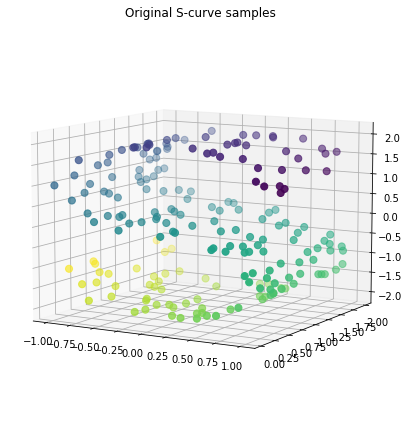

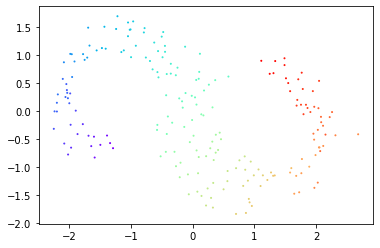

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

def sammon(X, iter, err, alpha):
  nPoints = len(X)
  Y = np.random.normal(0.0, 1.0, [nPoints, 2])

  # Calculate constant (used in 2 and 4)
  constant = 0
  inputDistances = metrics.pairwise_distances(X)
  for i in range(nPoints):
    for j in range(nPoints):
      if i < j:
        constant += inputDistances[i,j]

  for _ in range(iter):
    outputDistances = metrics.pairwise_distances(Y)
    E = 0
    for i in range(nPoints):
      for j in range(nPoints):
        if i < j:
          if inputDistances[i,j] < 0.000001:
            E += ((outputDistances[i,j] - inputDistances[i,j])**2) / 0.00001
          else:
            E += ((outputDistances[i,j] - inputDistances[i,j])**2) / inputDistances[i,j]
    E = E / constant
    if E < err:
      return Y

    for i in range(nPoints):
      pd1, pd2 = 0, 0
      for j in range(nPoints):
        if j != i:
          denominator = outputDistances[i,j] * inputDistances[i,j]
          if denominator < 0.0001:
            denominator = 0.001
          pd1 += ((inputDistances[i,j] - outputDistances[i,j]) / denominator) * (Y[i] - Y[j])
          pd2 += ((inputDistances[i,j] - outputDistances[i,j]) - ((Y[i] - Y[j])**2 / outputDistances[i,j]) * (1 + ((inputDistances[i,j] - outputDistances[i,j]) / outputDistances[i,j]))) / denominator
      pd = np.divide((-2/constant) * pd1, np.abs((-2/constant) * pd2))
      Y[i] = Y[i] - alpha * pd
      curE = E
  return Y

def plot_3d(points, points_color, title):
  x, y, z = points.T
  fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
  )
  fig.suptitle(title)
  ax.scatter(x, y, z, c=points_color, s=50)
  ax.view_init(azim=-60, elev=9)
  plt.show()

def main():
  X, target = datasets.make_s_curve(n_samples=200)
  reduced = sammon(X, 100, 3e-2, 0.7)
  plt.show()
  plot_3d(X, target, "Original S-curve samples")
  plt.scatter(reduced[:, 0], reduced[:, 1], c=target, cmap='rainbow', s = 1)
  plt.show()

if __name__ == "__main__":
  main()

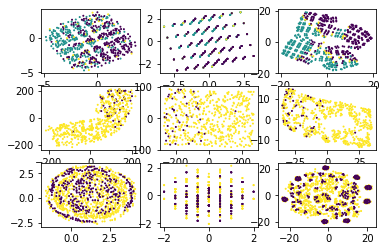

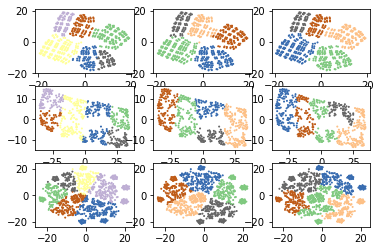

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sammon
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings

###
# Datasets used:
# Balance Scale
# https://www.openml.org/search?type=data&status=any&id=41077
#
# Monks problem
# https://www.openml.org/search?type=data&sort=runs&status=active&id=334
#
# Tic Tac Toe
# https://www.openml.org/search?type=data&sort=runs&status=active&id=50
#
#
# First picture legend:
# Sammon | PCA | t-SNE
#
# Second picture legend:
# BKmeans | KMeans | Agglomerative
#
###


def bkmeans(X, k, iter):
  currentCircles = np.zeros([len(X[:,0])], dtype="int64")
  count = 1
  
  for _ in range(k):
    arrayIndices = np.flatnonzero(currentCircles == np.bincount(currentCircles).argmax())
    curX = X[arrayIndices]
    
    kmeans = KMeans(n_clusters=2, max_iter=iter).fit(curX)
    labels = kmeans.labels_
    
    for i in range(len(arrayIndices)):
      if labels[i] == 1:
        currentCircles[arrayIndices[i]] = count
    count += 1
  return currentCircles

def drtech(X1, X2, X3):
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3)
  data = sammon.sammon(X1[:,:4], 100, 3e-2, 0.7)
  ax1.scatter(data[:,0], data[:,1], c = X1[:,4], s = 1)
  
  data = sammon.sammon(X2[:,:20], 100, 3e-2, 0.7)
  ax4.scatter(data[:,0], data[:,1], c = X2[:,20], s = 1)
  
  data = sammon.sammon(X3[:,:9], 100, 3e-2, 0.7)
  ax7.scatter(data[:,0], data[:,1], c = X3[:,9], s = 1)
  
  data = PCA(n_components=2).fit_transform(X1[:,:4])
  ax2.scatter(data[:,0], data[:,1], c = X1[:,4], s = 1)
   
  data = PCA(n_components=2).fit_transform(X2[:,:20])
  ax5.scatter(data[:,0], data[:,1], c = X2[:,20], s = 1)
  
  data = PCA(n_components=2).fit_transform(X3[:,:9])
  ax8.scatter(data[:,0], data[:,1], c = X3[:,9], s = 1)
  
  data1 = TSNE(learning_rate="auto").fit_transform(X1[:,:4])
  ax3.scatter(data1[:,0], data1[:,1], c = X1[:,4], s = 1)  
  
  data2 = TSNE(learning_rate="auto").fit_transform(X2[:,:20])
  ax6.scatter(data2[:,0], data2[:,1], c = X2[:,20], s = 1)
  
  data3 = TSNE(learning_rate="auto").fit_transform(X3[:,:9])
  ax9.scatter(data3[:,0], data3[:,1], c = X3[:,9], s = 1) 
  
  plt.show()
  return [data1, data2, data3] 

def clusteringtech(data):
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3)
  
  DATA = bkmeans(data[0], 5, 100)
  ax1.scatter(data[0][:,0], data[0][:,1], c = DATA, cmap = "Accent", s = 1)
  DATA = bkmeans(data[1], 5, 100)
  ax4.scatter(data[1][:,0], data[1][:,1], c = DATA, cmap = "Accent", s = 1)
  DATA = bkmeans(data[2], 5, 100)
  ax7.scatter(data[2][:,0], data[2][:,1], c = DATA, cmap = "Accent", s = 1)
    
  DATA = KMeans(n_clusters=5).fit(data[0])
  ax2.scatter(data[0][:,0], data[0][:,1], c = DATA.labels_, cmap = "Accent", s = 1)
  DATA = KMeans(n_clusters=5).fit(data[1])
  ax5.scatter(data[1][:,0], data[1][:,1], c = DATA.labels_, cmap = "Accent", s = 1)
  DATA = KMeans(n_clusters=5).fit(data[2])
  ax8.scatter(data[2][:,0], data[2][:,1], c = DATA.labels_, cmap = "Accent", s = 1)

  DATA = AgglomerativeClustering(n_clusters=5).fit(data[0])
  ax3.scatter(data[0][:,0], data[0][:,1], c = DATA.labels_, cmap = "Accent", s = 1)
  DATA = AgglomerativeClustering(n_clusters=5).fit(data[1])
  ax6.scatter(data[1][:,0], data[1][:,1], c = DATA.labels_, cmap = "Accent", s = 1)
  DATA = AgglomerativeClustering(n_clusters=5).fit(data[2])
  ax9.scatter(data[2][:,0], data[2][:,1], c = DATA.labels_, cmap = "Accent", s = 1)
  plt.show()

def main():
  warnings.filterwarnings("ignore")
  balance = np.genfromtxt("balance_scale.csv", delimiter=",")[1:,:]
  climate = np.genfromtxt("climate.csv", delimiter=",")[:,:]
  tic = np.genfromtxt("tictactoe.csv", delimiter=",")[1:,:]
  
  data = drtech(balance, climate, tic)
  clusteringtech(data)
main()

3.1 Comparison of DR Techniques -

3.1.1 The technique that works the best is different between my datasets, as for the balance dataset the technique that seemed to work the best was Sammon, it separated the different classes well while the others have alot of overlapping classes. As for the second dataset there doesn't seem to be a good solution for neither of the techniques. Lastly the tic-tac-toe datasets works really well with the t-SNE dataset. 

3.1.2 Classes are separated by colors, represented using a qualitative color scheme. Some datasets are easier to distinguish differences like the balance dataset where you can see clear differences in the Y-axis, while for the tic-tac-toe set you can see chunks of data that respond to a winning situation.

3.2 Comparison of Clustering Techniques

In my opinion the agglomerative clustering technique brings the best result in most cases, however in these datasets with t-SNE I could argue for either Kmeans or agglomerative because they are giving very similar results, however one splits it horizontally and one vertically. So depending on what you're searching for they could provide different results. 

As for each individual set for balance the agglomerative techniques gives the least anomalies as seen the crossection of top and bottom part. The climate dataset however works better with KMeans as it doesn't cross the gap between the values. As for the tic tac toe dataset there doesn't seem to be a good way to cluster them with these techniques, or they all provide the same level of quality.